In [1]:
import tensorflow as tf

In [2]:
print(f'wersja tf: {tf.__version__}')

wersja tf: 2.10.1


In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


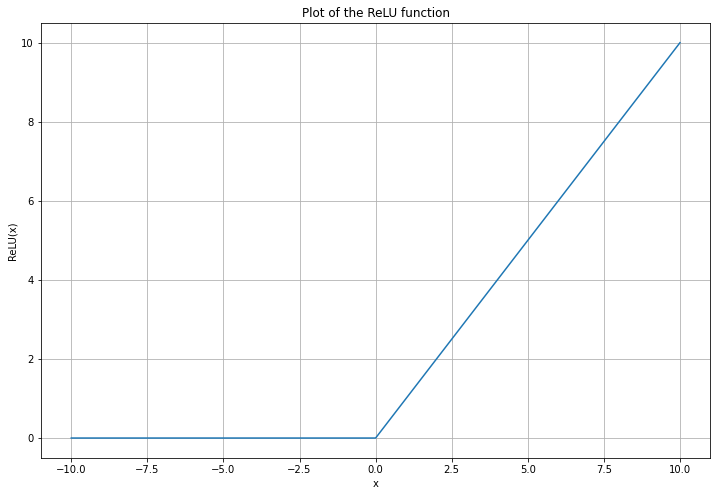

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values
x = np.linspace(-10, 10, 1000)

# Calculate y values
y = relu(x)

# Create plot
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('Plot of the ReLU function')
plt.grid(True)
plt.show()

In [8]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2944 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1391 - accuracy: 0.9592
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1031 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0853 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9766


In [10]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy:{test_accuracy}')
print(f'strata: {test_loss}')

313/313 - 1s - loss: 0.0813 - accuracy: 0.9751 - 622ms/epoch - 2ms/step
Test accuracy:0.9750999808311462
strata: 0.08133910596370697


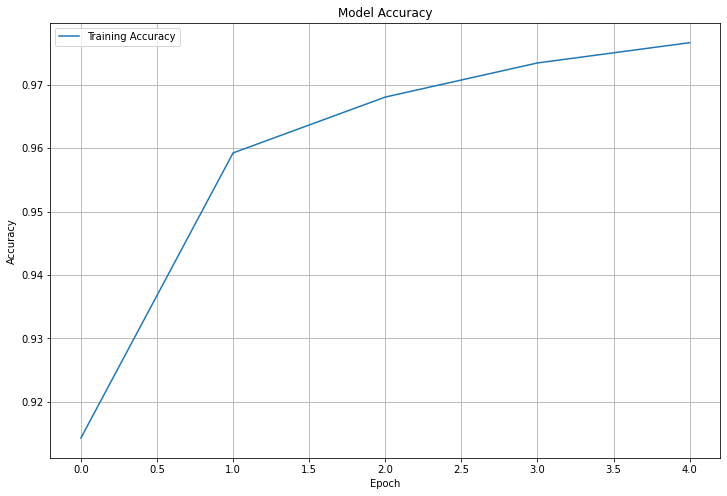

In [11]:
# Cell
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.grid(True)
plt.show()


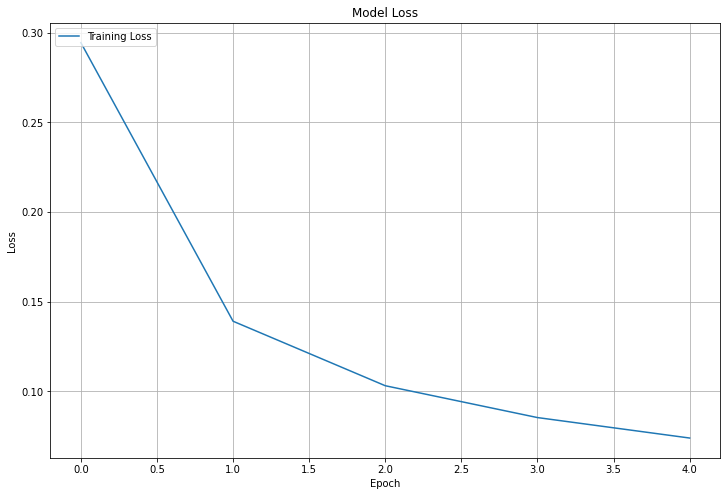

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper left')
plt.grid(True)
plt.show()